In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters
num_photons = 1000        # Number of photons
time_window = 0.01        # Coincidence time window for detection
simulation_time = 10      # Total simulation time in arbitrary units

# Generate photon arrival times. Assume source is coherent (monochromatic and constant phase). 
# Wider context:  

def photon_arrivals(num_photons, simulation_time):
    # Coherent light is modelled by uniformly distributed arrivals
    min = 0 # time starts from 0
    max = simulation_time # simulation time ends
    num_values = num_photons # number of photons arrived
    
    return np.sort(np.random.uniform(min, max, num_values)) # randmomly generates when photons are detected within the simulation time. 

# Detector response to photon arrivals
def detect_photons(arrival_times, num_detectors=2):
    detector_times = []
    for i in range(num_detectors):
        mean = 0
        stdev = time_window / 2 # assume photon arrival time is centred within time window
        no_of_values = len(arrival_times) # number of photons detected

        detector_times.append(arrival_times + np.random.normal(mean, stdev, no_of_values))
    return detector_times

# Count coincidences within specified time window
def count_coincidences(detector_a, detector_b, time_window):
    coincidences = 0
    for time_a in detector_a:
        close_times = np.abs(detector_b - time_a) <= time_window # accept coincidences within time_window only
        coincidences += np.sum(close_times) # number of coincidences within the time frame
    return coincidences

Coincidences = 2873
Expected coincidences = 2000.0
g^2(0) value: 1.4365


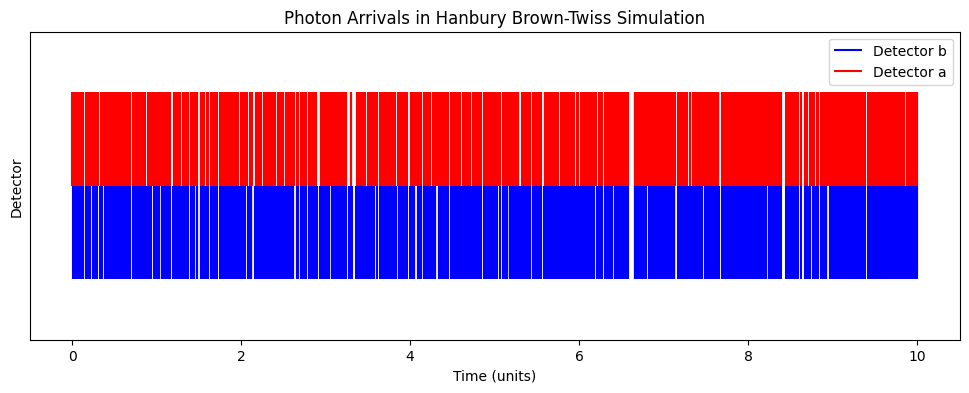

In [38]:
# Run the simulation
arrival_times = photon_arrivals(num_photons, simulation_time)
detector_a, detector_b = detect_photons(arrival_times)

# Calculate the number of coincidences
coincidences = count_coincidences(detector_a, detector_b, time_window)

# Normalise coincidences, calculate 2nd-order correlation coefficient g^2(0)
counts_a = len(detector_a) # counts in detector a
counts_b = len(detector_b)

expected_coincidences = counts_a * counts_b * (2 * time_window) / simulation_time # calculate no. of expected coincidences

print(f'Coincidences = {coincidences}')
print(f'Expected coincidences = {expected_coincidences}')

g2_zero = coincidences / expected_coincidences

# Output results
print(f'g^2(0) value: {g2_zero}')

# Plot the photon arrivals
plt.figure(figsize=(12, 4))
plt.eventplot([detector_a, detector_b], colors=['blue', 'red'])
plt.legend(['Detector b', 'Detector a'])
plt.title('Photon Arrivals in Hanbury Brown-Twiss Simulation')
plt.xlabel("Time (units)")
plt.ylabel("Detector")
plt.yticks([])
plt.show()

Text(0, 0.5, '$g^2(0)$')

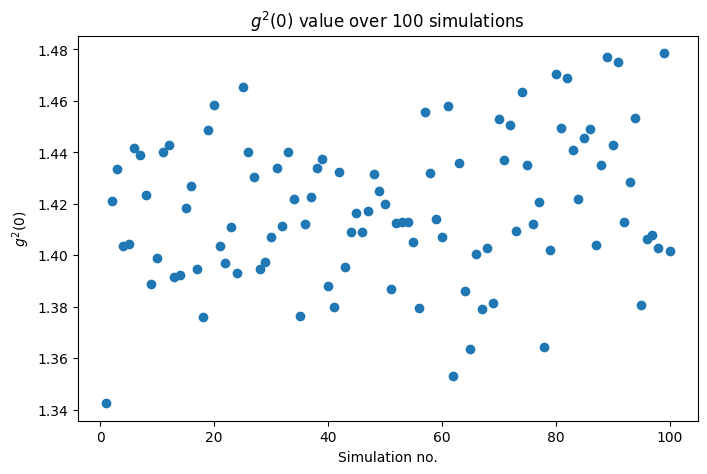

In [58]:
# Running the simulation multiple times. 
# Observe distribution of expected g2(0) values. Compare this to expected g2_zero values from theory. 

# Expected values for g2(0): 0 (classical), 1 (quantum)


N = 100 # number of simulations to run
index = np.linspace(1, N, N) # index list
g2_zero_values = [] # list of g2_zero values from simulations

for i in range(N):
    # Run the simulation
    arrival_times = photon_arrivals(num_photons, simulation_time)
    detector_a, detector_b = detect_photons(arrival_times)

    # Calculate the number of coincidences
    coincidences = count_coincidences(detector_a, detector_b, time_window)
    
    # Normalise coincidences, calculate 2nd-order correlation coefficient g^2(0)
    counts_a = len(detector_a) # counts in detector a
    counts_b = len(detector_b)
    
    expected_coincidences = counts_a * counts_b * (2 * time_window) / simulation_time # calculate no. of expected coincidences
    g2_zero = coincidences / expected_coincidences
    
    g2_zero_values.append(g2_zero) # add g2_zero value to list

#print(g2_zero_values)

# Plotting data
plt.figure(figsize = (8,5))
plt.title(f'$g^2(0)$ value over {N} simulations')
plt.scatter(index, g2_zero_values)
plt.xlabel('Simulation no.')
plt.ylabel(r'$g^2(0)$')

### **Comments**
1. May need to add noise (e.g. Dark spots/jitter) into the simulation to gain more accurate results for $g^2(0).$
2. Calculate accidental coincidences after adding noise to see if it accounts for difference in simulated $g^2(0)$ from theory. 